In [23]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pickle
from glob import glob
from scipy.misc import imread
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import cv2
from keras.preprocessing.image import ImageDataGenerator

%matplotlib inline

In [24]:
with open('../data/data.p', 'rb') as f:
    data = pickle.load(f)

In [25]:
X_train, y_train = data['train']

In [26]:
print('Length X_train', len(X_train))
print('Length y_train', len(y_train))

Length X_train 20574
Length y_train 20574


In [27]:
cars = X_train[y_train==1]

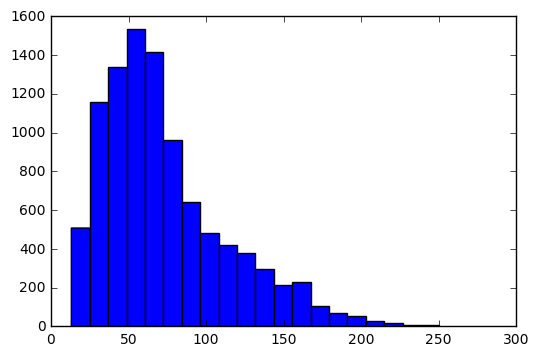

In [28]:
_ = plt.hist(np.mean(cars[:, 16:48, 16:48], axis=(1,2,3)), bins=20)

In [29]:
wht_filter = np.mean(cars[:, 16:48, 16:48], axis=(1,2,3)) > 130

In [62]:
idg = ImageDataGenerator(
    rotation_range=20.,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    channel_shift_range=20,
    horizontal_flip=True)

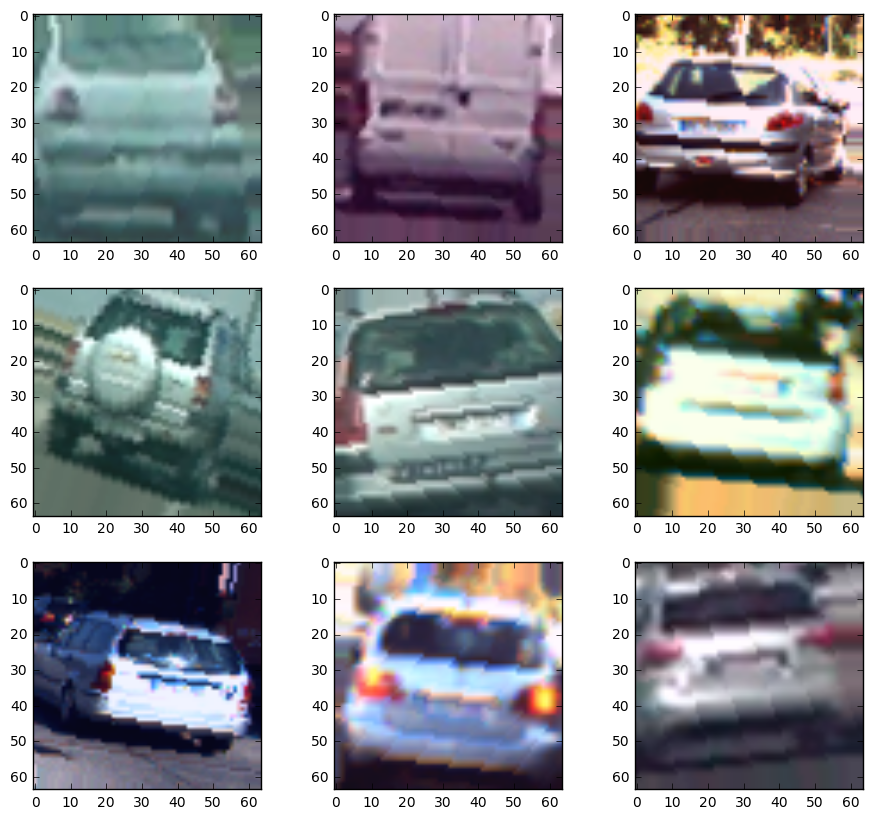

In [63]:
fig, axis = plt.subplots(3,3, figsize=(11,10))
for i, (x,y) in enumerate(idg.flow(cars[wht_filter], np.ones(len(cars[wht_filter])), batch_size=1)):
    if i == 9: break
    axis[i%3, i//3].imshow(x[0].astype(np.uint8))

In [67]:
for i, (x,y) in enumerate(idg.flow(cars[wht_filter], np.ones(len(cars[wht_filter])), batch_size=100)):
    if i == 25: break
        
    X_train = np.concatenate((X_train, x.astype(np.uint8)), axis=0)
    y_train = np.concatenate((y_train, y.astype(np.uint8)), axis=0)

In [69]:
cars_new = X_train[y_train==1]

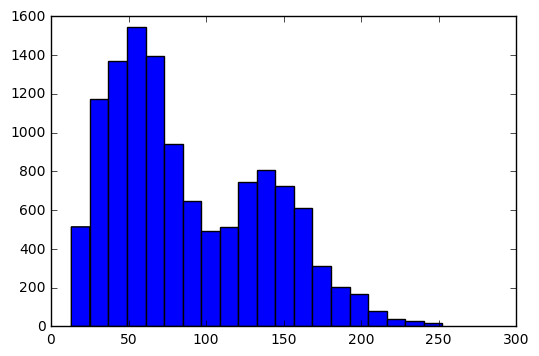

In [70]:
_ = plt.hist(np.mean(cars_new[:, 16:48, 16:48], axis=(1,2,3)), bins=20)

In [71]:
print('Length X_train', len(X_train))
print('Length y_train', len(y_train))

Length X_train 23038
Length y_train 23038


In [72]:
data['train'] = (X_train, y_train)

In [73]:
with open('../data/data_adj.p', 'wb') as f:
    pickle.dump(data, f)